[1 0 0 0 1 0 1 1 1 1]


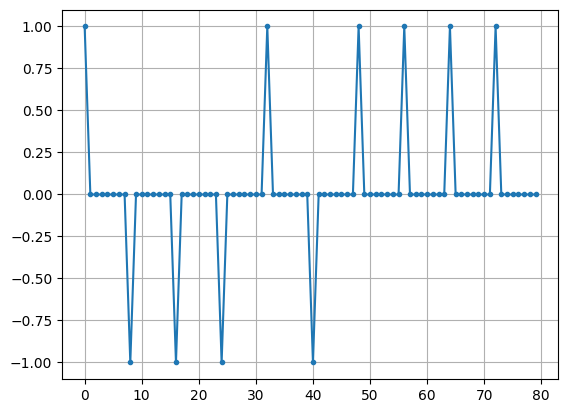

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

num_symbols = 10
sps = 8

bits = np.random.randint(0, 2, num_symbols) # Our data to be transmitted, 1's and 0's
print(bits)

x = np.array([])
for bit in bits:
    pulse = np.zeros(sps)
    pulse[0] = bit*2-1 # set the first value to either a 1 or -1
    x = np.concatenate((x, pulse)) # add the 8 samples to the signal
plt.figure(0)
plt.plot(x, '.-')
plt.grid(True)
plt.show()

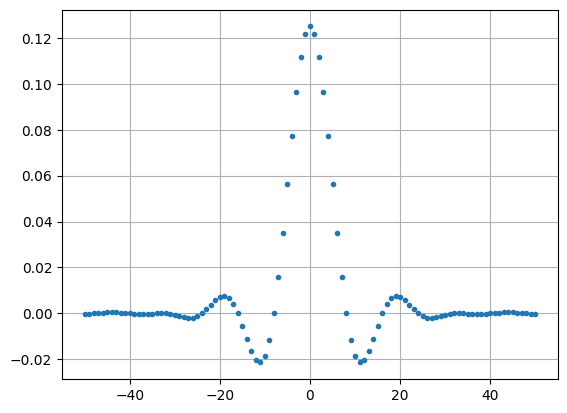

In [3]:
# Create our raised-cosine filter
num_taps = 101
beta = 0.35
Ts = sps # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8
t = np.arange(num_taps) - (num_taps-1)//2
h = 1/Ts*np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)
plt.figure(1)
plt.plot(t, h, '.')
plt.grid(True)
plt.show()

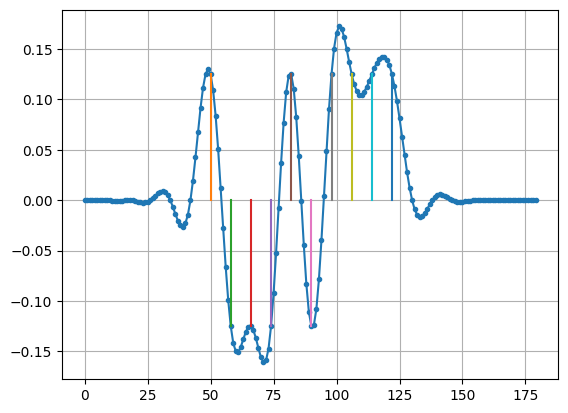

In [4]:
# Filter our signal, in order to apply the pulse shaping
x_shaped = np.convolve(x, h)
plt.figure(2)
plt.plot(x_shaped, '.-')
for i in range(num_symbols):
    plt.plot([i*sps+num_taps//2,i*sps+num_taps//2], [0, x_shaped[i*sps+num_taps//2]])
plt.grid(True)
plt.show()